In [39]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
tablenames = ['深圳地铁轨道数据6.23-6.29.xlsx', '深圳地铁轨道数据7.3-7.9.xlsx', '深圳地铁轨道数据7.11-7.19.xlsx']
dftables = [pd.read_excel(name) for name in tablenames]


In [41]:
df = pd.concat(dftables, ignore_index = True)
df = df[~df['测点编号'].isin(['kz1', 'kz2', 'kz3', 'kz4'])]

In [42]:
df.columns

Index(['测点编号', '东坐标', '东单次变形量(mm)', '东累计变形量(mm)', '北坐标', '北单次变形量(mm)',
       '北累计变形量(mm)', '高程', '高程单次变形量(mm)', '高程累计变形量(mm)', '水平角(°)', '竖直角(°)',
       '斜距(m)', '采集时间', '备注'],
      dtype='object')

In [44]:
df['采集时间'] = '2025-' + df['采集时间']

In [45]:
df['采集时间'] = pd.to_datetime(df['采集时间'])

In [46]:
df['采集时间'].dt.date.nunique()

23

In [47]:
df_index = df.copy()

In [48]:
df_index.columns

Index(['测点编号', '东坐标', '东单次变形量(mm)', '东累计变形量(mm)', '北坐标', '北单次变形量(mm)',
       '北累计变形量(mm)', '高程', '高程单次变形量(mm)', '高程累计变形量(mm)', '水平角(°)', '竖直角(°)',
       '斜距(m)', '采集时间', '备注'],
      dtype='object')

In [54]:
df.head()

,测点编号,东坐标,东单次变形量(mm),东累计变形量(mm),北坐标,北单次变形量(mm),北累计变形量(mm),高程,高程单次变形量(mm),高程累计变形量(mm),水平角(°),竖直角(°),斜距(m),采集时间,备注
0,jc1-1,-8.250412,-1.079313,-0.705834,-55.176856,-1.699384,-1.527354,0.619519,-0.720123,-0.468756,188.507345,89.402189,55.793324,2025-06-23 02:44:56,NaN
1,jc1-2,-8.177117,-0.771231,-0.407099,-45.494673,-1.408458,-1.365795,-0.833249,-1.121045,-0.491027,190.192574,91.079063,46.231918,2025-06-23 02:44:56,NaN
2,jc1-3,-11.323727,-0.495140,-0.640415,-54.732223,-1.865950,-1.639858,-0.741401,-0.920607,-0.384709,191.692289,90.798314,55.896799,2025-06-23 02:44:56,NaN
3,jc1-4,-13.397439,-0.472036,-0.588905,-54.282906,-1.870404,-1.600502,0.665662,0.164201,-0.310239,193.867068,89.356209,55.915324,2025-06-23 02:44:56,NaN
4,jc1-5,-13.304058,-0.527272,-0.635378,-54.301201,-1.851851,-1.432223,2.240418,0.340123,-0.097038,193.769664,87.743430,55.950650,2025-06-23 02:44:56,NaN


In [49]:
df_index[['测点编号', '东坐标', '东单次变形量(mm)', '东累计变形量(mm)', '北坐标', '北单次变形量(mm)',\
          '北累计变形量(mm)', '高程', '高程单次变形量(mm)', '高程累计变形量(mm)', '采集时间']].describe()

,东坐标,东单次变形量(mm),东累计变形量(mm),北坐标,北单次变形量(mm),北累计变形量(mm),高程,高程单次变形量(mm),高程累计变形量(mm),采集时间
count,7425.000000,7425.000000,7425.000000,7425.000000,7425.000000,7425.000000,7425.000000,7425.000000,7425.000000,7425
mean,-3.910799,0.001238,-0.041582,-5.705313,-0.002458,-0.229559,-0.634463,0.001760,-0.904906,2025-07-07 00:49:28.562962944
min,-13.397869,-1.281018,-1.320197,-55.177191,-1.920406,-1.976949,-2.890223,-6.235403,-6.306990,2025-06-23 02:44:56
25%,-8.176872,-0.134680,-0.287559,-35.077438,-0.060575,-1.132598,-1.614212,-0.202572,-1.100797,2025-06-28 14:44:27
50%,-3.538258,0.003386,-0.050284,-5.466021,-0.002533,-0.399181,-0.833338,0.015936,-0.898921,2025-07-07 16:43:58
75%,0.169984,0.135851,0.189607,24.047376,0.057164,0.717278,0.246086,0.212691,-0.693955,2025-07-14 08:44:51
max,5.561875,0.848534,1.281780,43.915953,1.817636,1.521704,2.241033,5.525715,3.224519,2025-07-19 20:44:44
std,4.857754,0.210430,0.364776,31.431915,0.137336,0.969661,1.283962,0.517866,0.424186,NaN


In [50]:
describe = df_index[['测点编号', '东坐标', '东单次变形量(mm)', '东累计变形量(mm)', '北坐标', '北单次变形量(mm)',\
          '北累计变形量(mm)', '高程', '高程单次变形量(mm)', '高程累计变形量(mm)', '采集时间']].describe()

In [66]:
df.to_excel('深圳地铁轨道数据全部.xlsx', index = False)

In [55]:
df

,测点编号,东坐标,东单次变形量(mm),东累计变形量(mm),北坐标,北单次变形量(mm),北累计变形量(mm),高程,高程单次变形量(mm),高程累计变形量(mm),水平角(°),竖直角(°),斜距(m),采集时间,备注
0,jc1-1,-8.250412,-1.079313,-0.705834,-55.176856,-1.699384,-1.527354,0.619519,-0.720123,-0.468756,188.507345,89.402189,55.793324,2025-06-23 02:44:56,NaN
1,jc1-2,-8.177117,-0.771231,-0.407099,-45.494673,-1.408458,-1.365795,-0.833249,-1.121045,-0.491027,190.192574,91.079063,46.231918,2025-06-23 02:44:56,NaN
2,jc1-3,-11.323727,-0.495140,-0.640415,-54.732223,-1.865950,-1.639858,-0.741401,-0.920607,-0.384709,191.692289,90.798314,55.896799,2025-06-23 02:44:56,NaN
3,jc1-4,-13.397439,-0.472036,-0.588905,-54.282906,-1.870404,-1.600502,0.665662,0.164201,-0.310239,193.867068,89.356209,55.915324,2025-06-23 02:44:56,NaN
4,jc1-5,-13.304058,-0.527272,-0.635378,-54.301201,-1.851851,-1.432223,2.240418,0.340123,-0.097038,193.769664,87.743430,55.950650,2025-06-23 02:44:56,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7956,jc11-1,5.560885,-0.383921,-0.458563,42.994082,-0.105348,0.911833,-1.784142,-2.489283,-1.017149,7.371596,92.406062,43.390552,2025-07-19 20:44:44,NaN
7957,jc11-2,4.180933,-0.183295,0.325312,43.769847,-0.068599,1.127028,-2.885687,-0.921257,-1.771201,5.458229,93.803516,44.066231,2025-07-19 20:44:44,NaN
7958,jc11-3,2.619336,-0.189709,0.062077,43.915642,0.101691,1.210807,-2.884318,0.526044,-0.513872,3.415195,93.799618,44.090706,2025-07-19 20:44:44,NaN
7959,jc11-4,0.461367,-0.207349,-0.143725,43.579218,0.044334,0.803038,-1.538970,0.001526,-0.750220,0.608411,92.071576,43.610278,2025-07-19 20:44:44,NaN


In [72]:
import numpy as np
bins = [round(x, 1) for x in np.arange(-1.1, 1.1 + 0.2, 0.2)]

/tmp/ipykernel_10122/1656992190.py:26: UserWarning: Glyph 39640 (\N{CJK UNIFIED IDEOGRAPH-9AD8}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_10122/1656992190.py:26: UserWarning: Glyph 31243 (\N{CJK UNIFIED IDEOGRAPH-7A0B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_10122/1656992190.py:26: UserWarning: Glyph 32047 (\N{CJK UNIFIED IDEOGRAPH-7D2F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_10122/1656992190.py:26: UserWarning: Glyph 35745 (\N{CJK UNIFIED IDEOGRAPH-8BA1}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_10122/1656992190.py:26: UserWarning: Glyph 21464 (\N{CJK UNIFIED IDEOGRAPH-53D8}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_10122/1656992190.py:26: UserWarning: Glyph 24418 (\N{CJK UNIFIED IDEOGRAPH-5F62}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_10122/1656992190.py:26: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAP

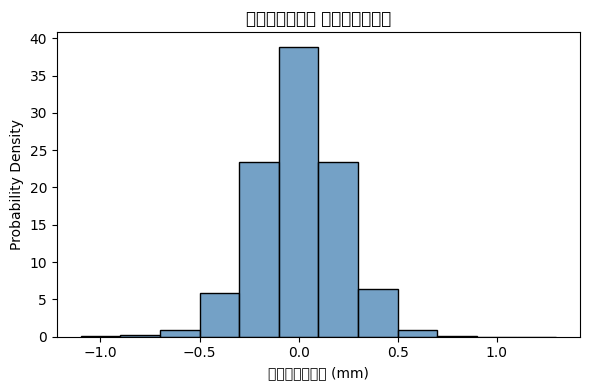

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 设定分箱边界（根据你的数据范围自行调整）
# bin_edges = [-4, -2, -1, 0, 1, 2, 3, 6]          # 左闭右开

# 2. 计算每个样本所属的箱标签（可选，用于后续标注）
df['bin'] = pd.cut(df['东单次变形量(mm)'],
                   bins=bins,
                   right=False,
                   include_lowest=True)

# 3. 绘制直方图：y 轴为概率密度（stat='density'）
plt.figure(figsize=(6, 4))
sns.histplot(data=df,
             x='东单次变形量(mm)',
             bins=bins,
             stat='percent',      # 关键：高为概率密度
             kde=False,
             color='steelblue',
             edgecolor='k')

plt.ylabel('Probability Density')
plt.xlabel('高程累计变形量 (mm)')
plt.title('高程累计变形量 概率密度直方图')
plt.tight_layout()
plt.show()

In [48]:
data = df[df['测点编号'] == 'jc6-2']['高程单次变形量(mm)']

In [49]:
from scipy import stats
import numpy as np

# 示例数据（替换为您的数据）


# 执行Shapiro-Wilk检验
w_stat, p_value = stats.shapiro(data)

print(f"Shapiro-Wilk统计量 W = {w_stat:.4f}")
print(f"p值 = {p_value:.4f}")

# 结果解读（α=0.05）
alpha = 0.05
if p_value > alpha:
    print("不能拒绝原假设：数据服从正态分布 (p > 0.05)")
else:
    print("拒绝原假设：数据不服从正态分布 (p ≤ 0.05)")

Shapiro-Wilk统计量 W = 0.9454
p值 = 0.0000
拒绝原假设：数据不服从正态分布 (p ≤ 0.05)


In [23]:
df = pd.read_excel('深圳地铁轨道数据6.23-6.29.xlsx')
df = df[~df['测点编号'].isin(['kz1', 'kz2', 'kz3', 'kz4'])]
# df['temp'] = df['测点编号'].str.replace('jc','')

In [24]:
df['测点编号2'], df['测点编号2_index'] = df['测点编号'].str.split('-').str[0], df['测点编号'].str.split('-').str[1]

In [25]:
# df['测点编号2']  = df['测点编号2'].astype('int')
# df['测点编号2_index']  = df['测点编号2_index'].astype('int')

In [ ]:
from scipy import stats
import numpy as np

# 示例数据（替换为您的数据）
data = df_1['东单次变形量(mm)']

# 执行Shapiro-Wilk检验
w_stat, p_value = stats.shapiro(data)

print(f"Shapiro-Wilk统计量 W = {w_stat:.4f}")
print(f"p值 = {p_value:.4f}")

# 结果解读（α=0.05）
alpha = 0.05
if p_value > alpha:
    print("不能拒绝原假设：数据服从正态分布 (p > 0.05)")
else:
    print("拒绝原假设：数据不服从正态分布 (p ≤ 0.05)")

In [26]:
df_index = df.iloc[: 55]

In [30]:
df_index.loc[df_index.groupby(['测点编号2'])['高程'].idxmax()]

,测点编号,东坐标,东单次变形量(mm),东累计变形量(mm),北坐标,北单次变形量(mm),北累计变形量(mm),高程,高程单次变形量(mm),高程累计变形量(mm),水平角(°),竖直角(°),斜距(m),采集时间,备注,测点编号2,测点编号2_index
4,jc1-5,-13.304058,-0.527272,-0.635378,-54.301201,-1.851851,-1.432223,2.240418,0.340123,-0.097038,193.769664,87.743430,55.950650,06-23 02:44:56,NaN,jc1,5
49,jc10-5,-0.597866,0.057580,0.189147,34.695934,1.377482,1.096706,0.167630,-0.760707,-1.103874,359.015353,89.784966,34.701351,06-23 02:44:56,NaN,jc10,5
54,jc11-5,0.507886,-0.421019,0.018587,43.626396,1.797328,1.337501,-0.060602,0.173192,-0.878115,0.669611,90.128694,43.629478,06-23 02:44:56,NaN,jc11,5
9,jc2-5,-11.786143,-1.012814,-0.661215,-45.434425,-1.739969,-1.501442,2.144685,0.192093,-0.567901,194.545687,87.429438,46.985573,06-23 02:44:56,NaN,jc2,5
14,jc3-5,-10.165115,-1.281018,-0.667123,-35.072842,-0.815592,-0.890363,1.863555,0.488702,-0.232336,196.166312,87.137050,36.561887,06-23 02:44:56,NaN,jc3,5
19,jc4-5,-8.541424,-0.336650,-0.783032,-24.703220,-1.057933,-0.961266,1.626912,-0.096336,-0.558106,199.076749,86.520019,26.186527,06-23 02:44:56,NaN,jc4,5
24,jc5-5,-7.197186,-0.227652,-0.317576,-15.813258,-0.746795,-0.793702,1.490431,-0.445748,-0.512130,204.475534,85.219361,17.434801,06-23 02:44:56,NaN,jc5,5
29,jc6-5,-5.548732,-0.524052,-0.425587,-3.955857,0.586911,-0.144120,1.154136,-0.119905,-0.747739,234.517818,80.693445,6.905540,06-23 02:44:56,NaN,jc6,5
34,jc7-5,-4.353954,0.160793,-0.047169,4.969384,0.032003,0.265464,0.920427,-0.348836,-0.688946,318.778247,82.387575,6.665839,06-23 02:44:56,NaN,jc7,5
39,jc8-5,-3.046324,-0.247094,-0.002724,15.360426,0.600961,0.515435,0.246237,-0.400193,-0.780667,348.784657,89.235929,15.661041,06-23 02:44:56,NaN,jc8,5


In [5]:
df = (df.sort_values(by = ['测点编号2', '测点编号2_index','采集时间'], ascending = [True,True, True])
        .reset_index(drop = True))

In [6]:
df.columns

Index(['测点编号', '东坐标', '东单次变形量(mm)', '东累计变形量(mm)', '北坐标', '北单次变形量(mm)',
       '北累计变形量(mm)', '高程', '高程单次变形量(mm)', '高程累计变形量(mm)', '水平角(°)', '竖直角(°)',
       '斜距(m)', '采集时间', '备注', 'temp', '测点编号2', '测点编号2_index'],
      dtype='object')

In [7]:
cols = ['测点编号', '东坐标', '东单次变形量(mm)', '东累计变形量(mm)', '北坐标', '北单次变形量(mm)',
       '北累计变形量(mm)', '高程', '高程单次变形量(mm)', '高程累计变形量(mm)', '采集时间']
df = df[cols]
df['index'] = df.groupby('测点编号').cumcount() + 1

In [8]:
df

,测点编号,东坐标,东单次变形量(mm),东累计变形量(mm),北坐标,北单次变形量(mm),北累计变形量(mm),高程,高程单次变形量(mm),高程累计变形量(mm),采集时间,index
0,jc1-1,-8.250412,-1.079313,-0.705834,-55.176856,-1.699384,-1.527354,0.619519,-0.720123,-0.468756,06-23 02:44:56,1
1,jc1-1,-8.250308,0.103883,-0.601951,-55.176858,-0.002116,-1.529470,0.619408,-0.111278,-0.580034,06-23 06:43:43,2
2,jc1-1,-8.250322,-0.013138,-0.615088,-55.176866,-0.008260,-1.537730,0.619484,0.076029,-0.504005,06-23 10:44:49,3
3,jc1-1,-8.249904,0.417903,-0.197185,-55.176940,-0.073863,-1.611593,0.619580,0.095900,-0.408105,06-23 14:43:40,4
4,jc1-1,-8.250191,-0.287087,-0.484272,-55.176868,0.071846,-1.539746,0.618457,-1.122957,-1.531062,06-23 18:44:36,5
...,...,...,...,...,...,...,...,...,...,...,...,...
2305,jc11-5,0.508312,0.362370,0.444939,43.626295,-0.023508,1.236611,-0.060516,-0.346873,-0.791417,06-29 06:43:41,38
2306,jc11-5,0.508049,-0.263589,0.181350,43.626181,-0.114474,1.122137,-0.060348,0.167544,-0.623872,06-29 10:44:33,39
2307,jc11-5,0.508150,0.101580,0.282930,43.626320,0.138945,1.261083,-0.060383,-0.034605,-0.658477,06-29 14:44:33,40
2308,jc11-5,0.507990,-0.160096,0.122834,43.626174,-0.145800,1.115283,-0.060424,-0.040808,-0.699285,06-29 18:44:01,41


In [9]:
df = df.iloc[: 55]

In [10]:
df

,测点编号,东坐标,东单次变形量(mm),东累计变形量(mm),北坐标,北单次变形量(mm),北累计变形量(mm),高程,高程单次变形量(mm),高程累计变形量(mm),采集时间,index
0,jc1-1,-8.250412,-1.079313,-0.705834,-55.176856,-1.699384,-1.527354,0.619519,-0.720123,-0.468756,06-23 02:44:56,1
1,jc1-1,-8.250308,0.103883,-0.601951,-55.176858,-0.002116,-1.529470,0.619408,-0.111278,-0.580034,06-23 06:43:43,2
2,jc1-1,-8.250322,-0.013138,-0.615088,-55.176866,-0.008260,-1.537730,0.619484,0.076029,-0.504005,06-23 10:44:49,3
3,jc1-1,-8.249904,0.417903,-0.197185,-55.176940,-0.073863,-1.611593,0.619580,0.095900,-0.408105,06-23 14:43:40,4
4,jc1-1,-8.250191,-0.287087,-0.484272,-55.176868,0.071846,-1.539746,0.618457,-1.122957,-1.531062,06-23 18:44:36,5
5,jc1-1,-8.250089,0.101662,-0.382610,-55.176964,-0.095616,-1.635362,0.618357,-0.099452,-1.630514,06-23 22:44:20,6
6,jc1-1,-8.250119,-0.029631,-0.412241,-55.177039,-0.074609,-1.709971,0.619526,1.168864,-0.461650,06-24 02:43:28,7
7,jc1-1,-8.250005,0.113564,-0.298678,-55.177157,-0.118704,-1.828675,0.619624,0.097438,-0.364212,06-24 06:43:58,8
8,jc1-1,-8.250317,-0.312219,-0.610896,-55.177057,0.100089,-1.728586,0.619739,0.114913,-0.249299,06-24 10:45:08,9
9,jc1-1,-8.249798,0.519412,-0.091485,-55.177052,0.005599,-1.722987,0.619468,-0.270886,-0.520185,06-24 14:44:14,10


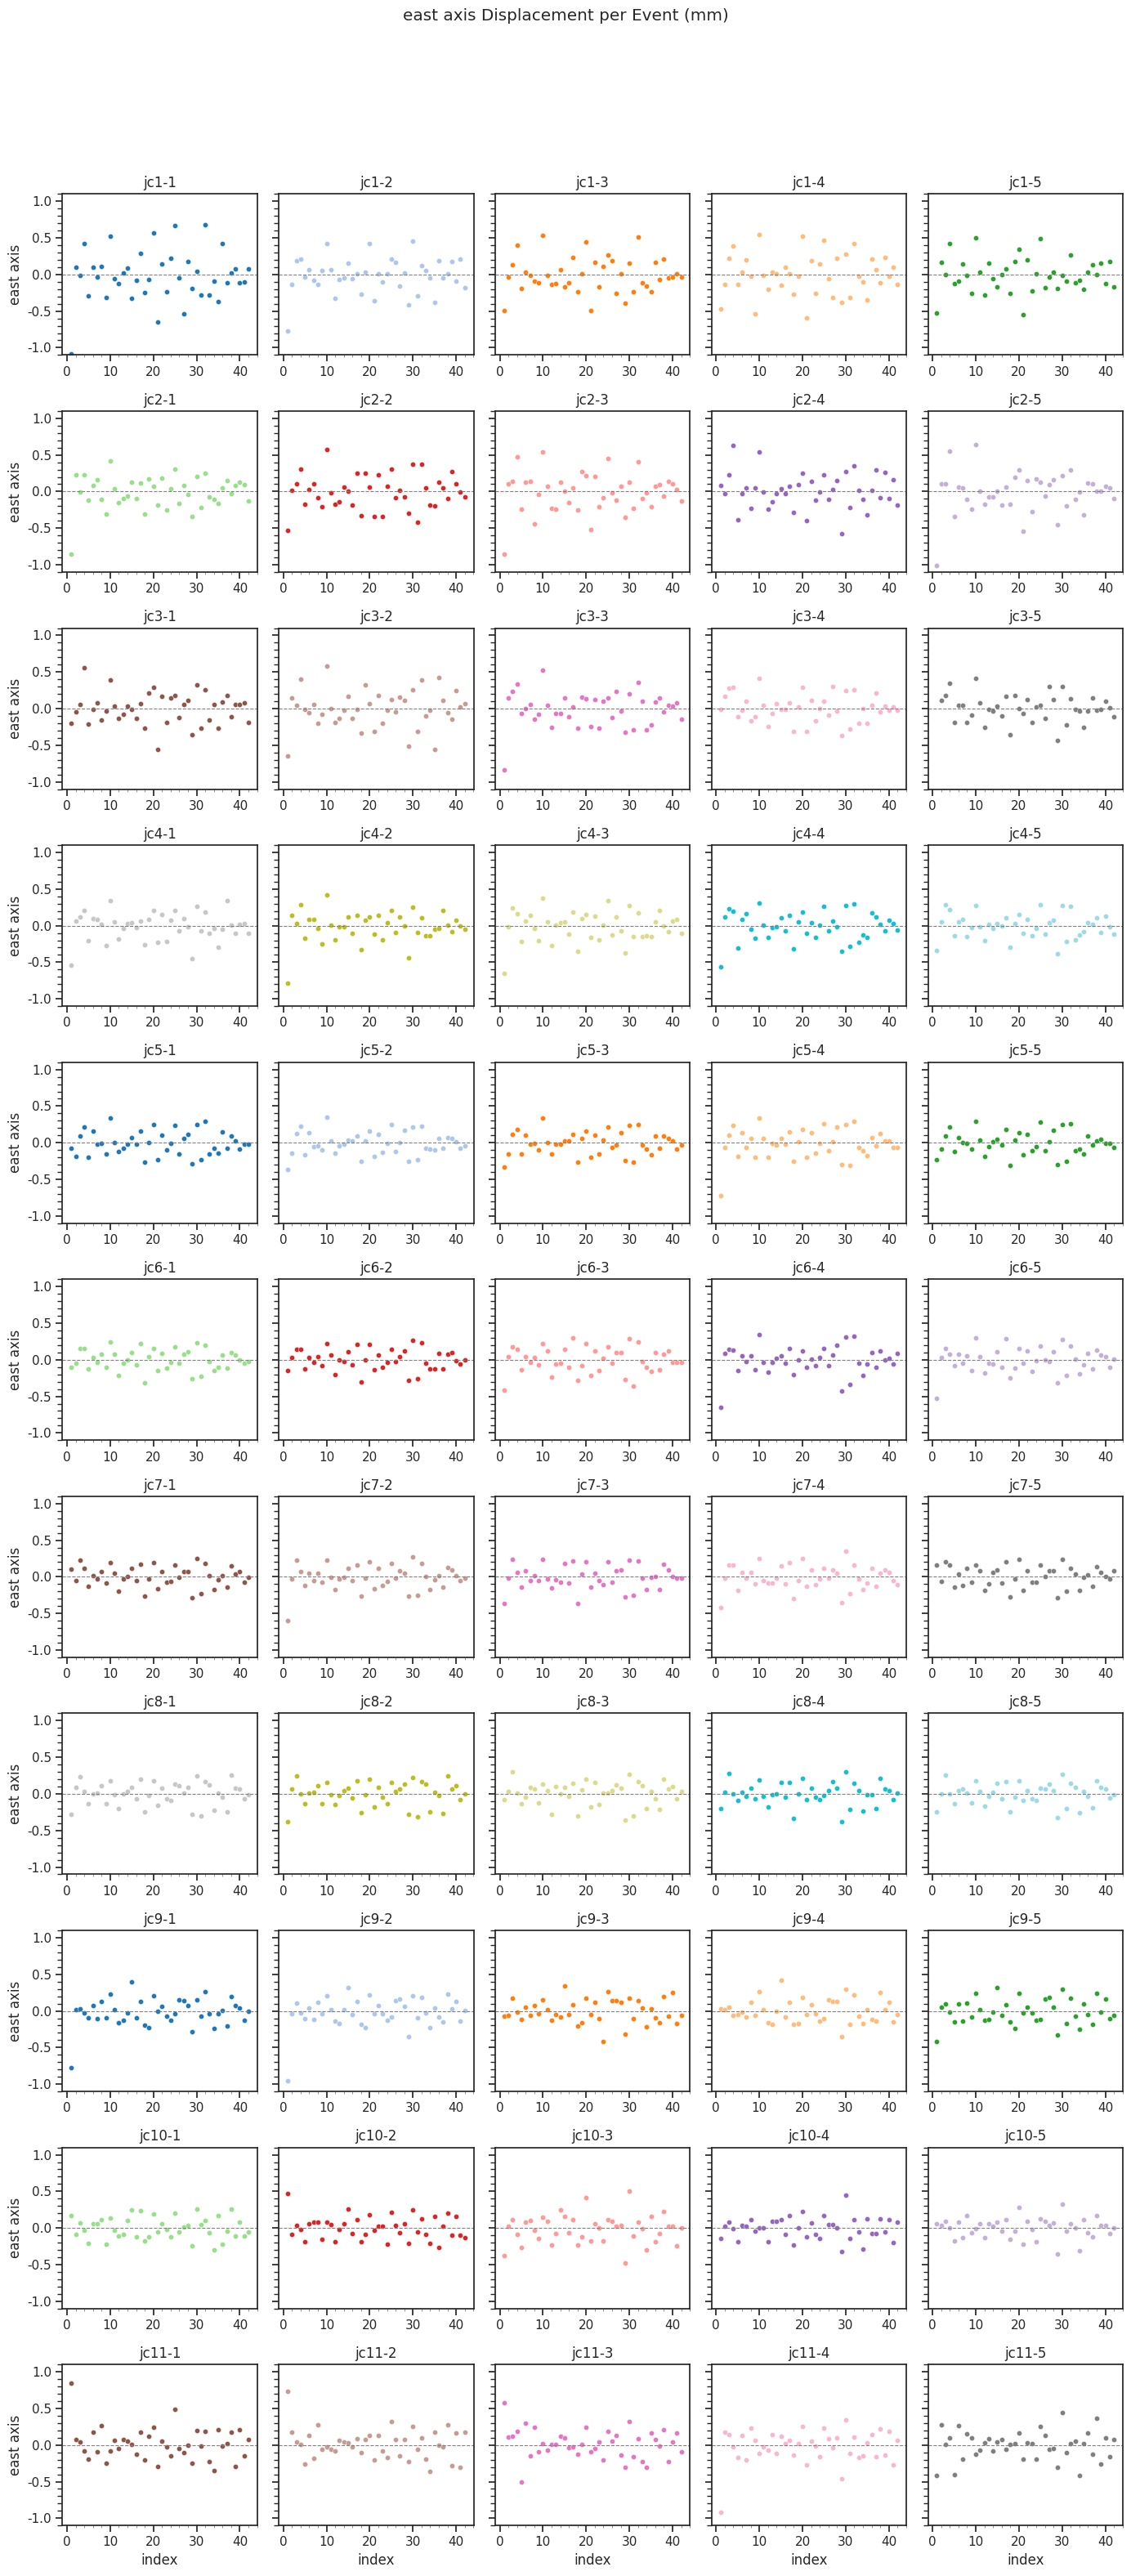

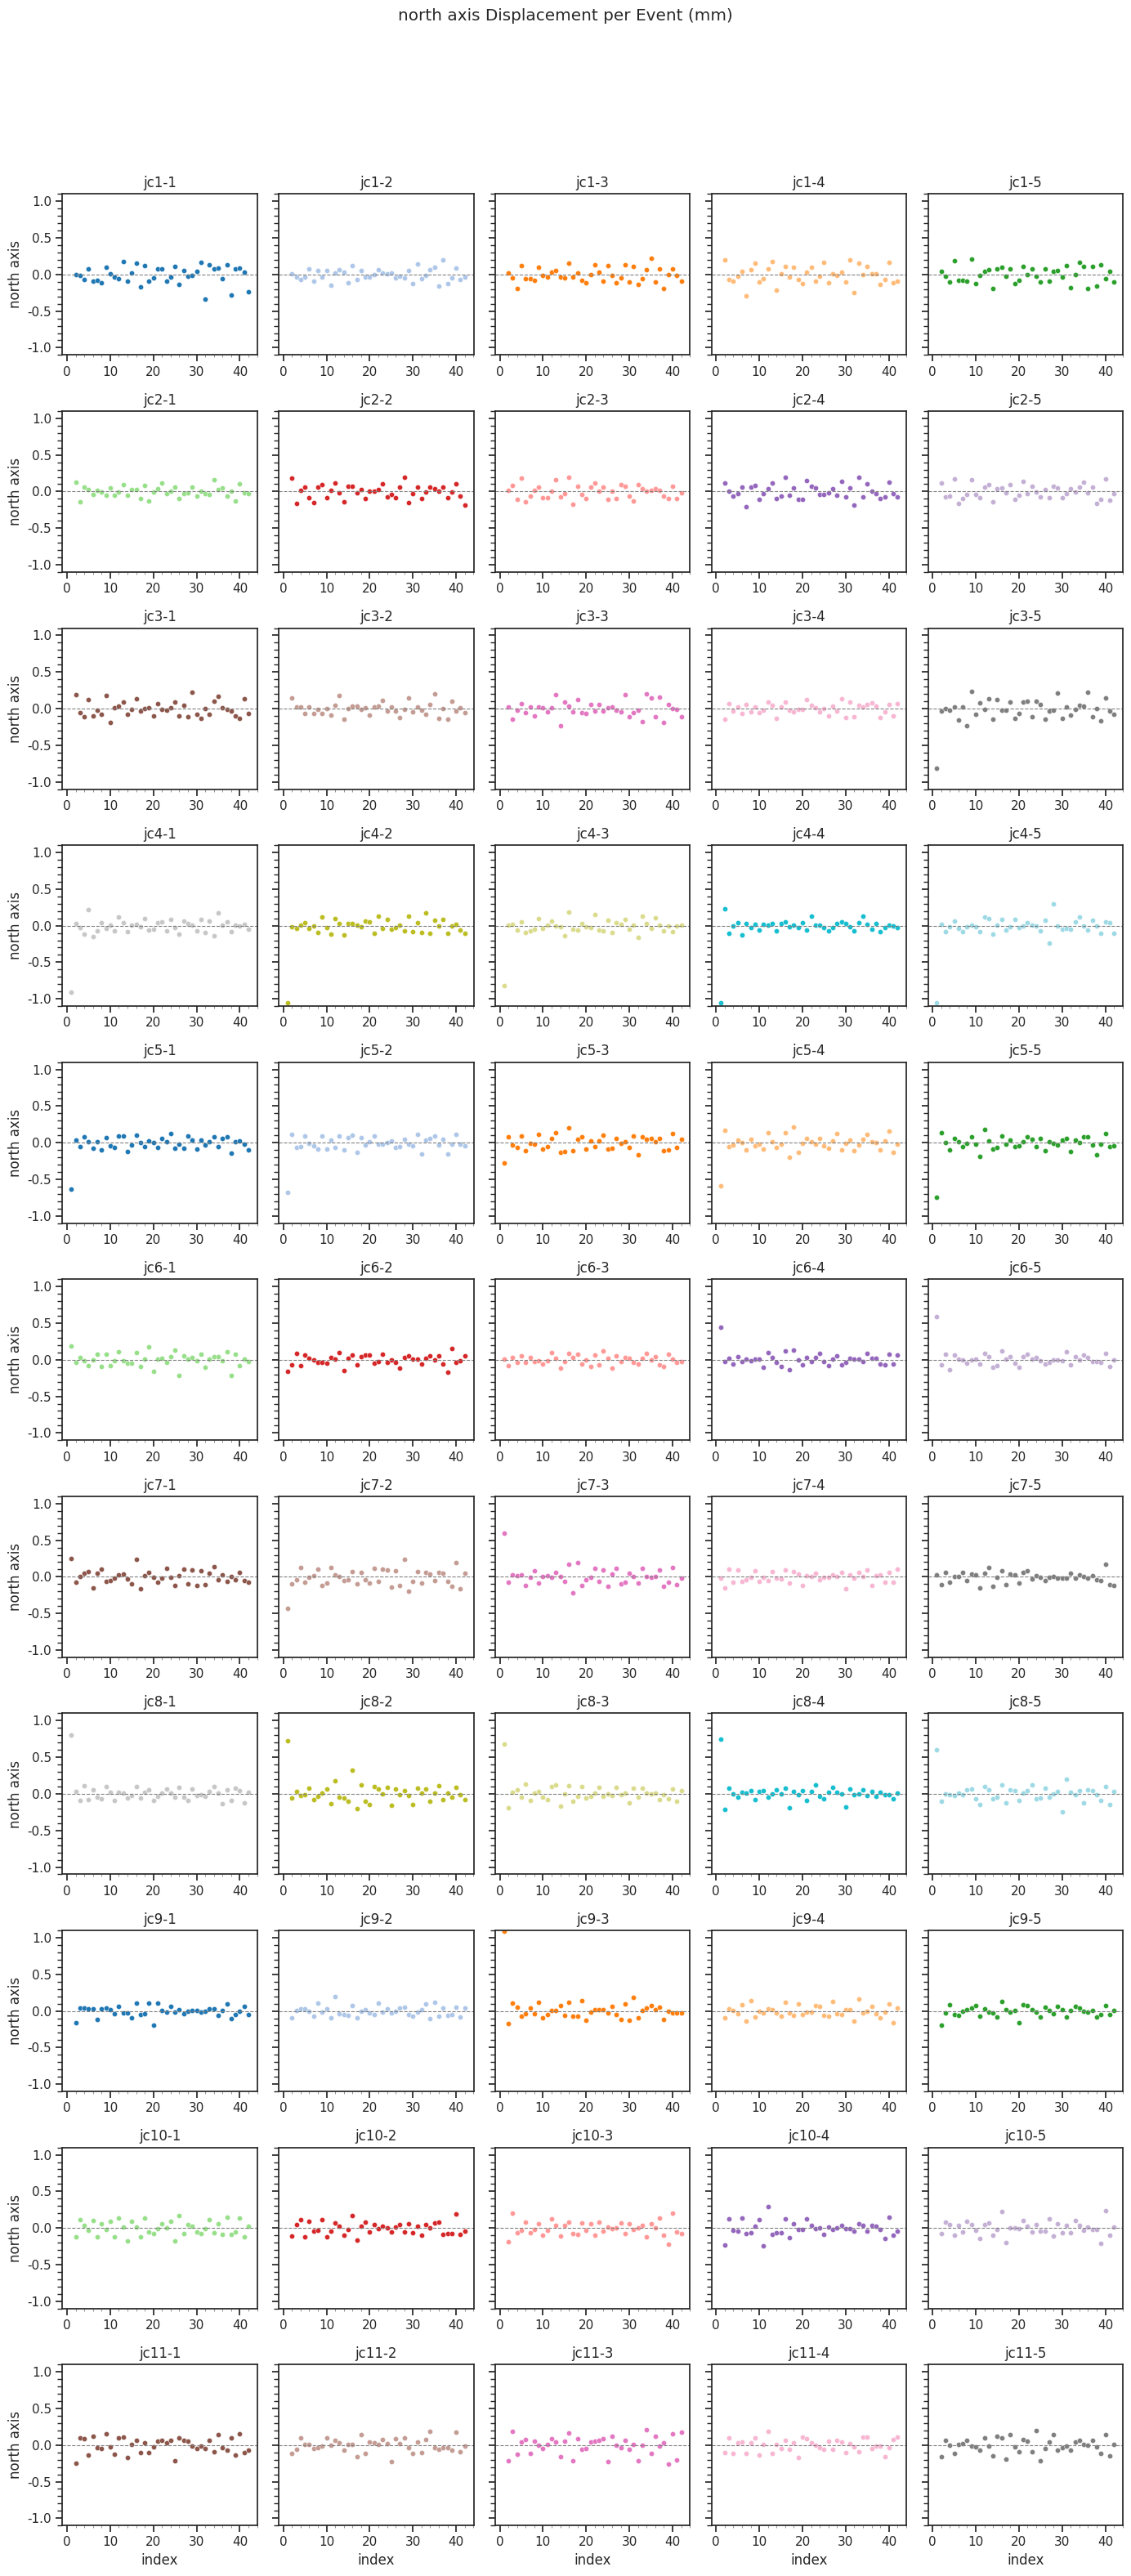

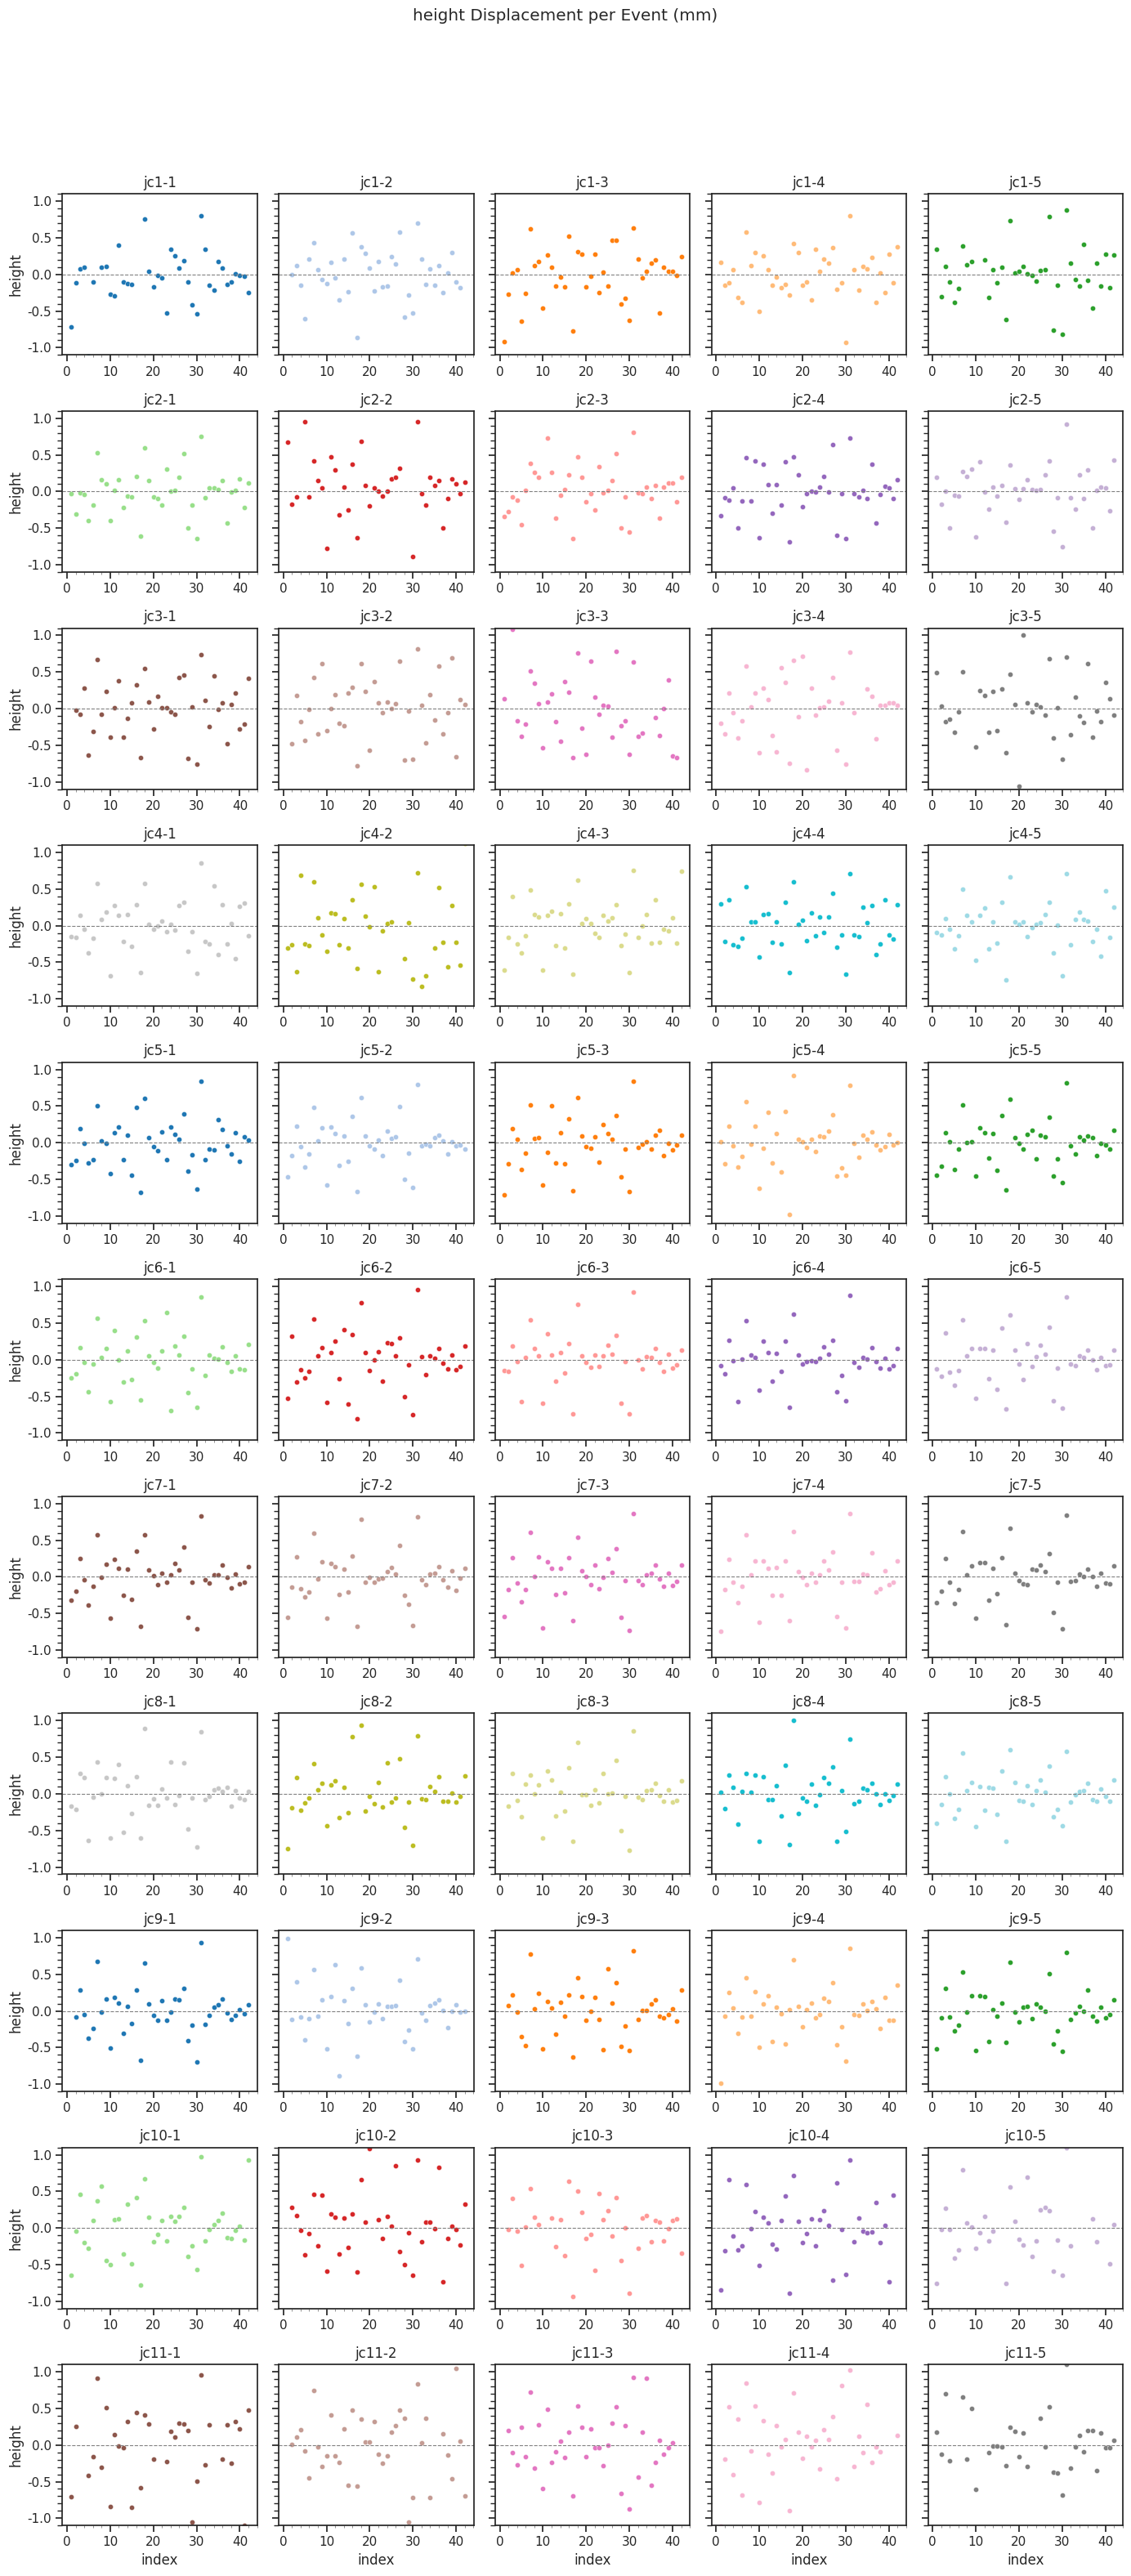

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
# 中文字体 & 主题设置
rc = {'axes.unicode_minus': False}
sns.set_theme(context='notebook', style='ticks', rc=rc)

# 1. 读数据 & 过滤

table = df.rename(columns={'东单次变形量(mm)': 'east axis',
                   '北单次变形量(mm)': 'north axis',
                   '高程单次变形量(mm)': 'height',
                   '测点编号': 'point No'})

jc_list = list(table['point No'].drop_duplicates(keep='first').tolist())


# 2. 子图，共用坐标轴
palette = sns.color_palette('tab20', n_colors=len(jc_list))
for col, name in zip(['east axis', 'north axis', 'height'] ,['东单次变形量(mm)', '北单次变形量(mm)', '高程单次变形量(mm)']):
    fig, axes = plt.subplots(
                        nrows=11, ncols=5,
                        sharex='all',
                        sharey='all',
                        figsize=(14, 30)        # 宽度 14 英寸，高度 30 英寸
                    )
    axes = axes.flatten()  #
    for ax, jc in zip(axes, jc_list):
        sns.scatterplot(data=table[table['point No'] == jc],
                        x='index',
                        y=col,
                        color=palette[jc_list.index(jc)],  # 一主题一色
                        s=20,
                        edgecolor='w',
                        linewidth=.3,
                        ax=ax)
        ax.axhline(0, color='grey', lw=0.8, ls='--')
        ax.set_yticks([1, 0.5, 0, -0.5, -1])
        ax.set_ylim(-1.1, 1.1)  
        ax.set_title(jc)          # 子图标题
        ax.legend().remove()      # 去掉重复图例

        ax.xaxis.set_tick_params(which='major', labelbottom=True)
        ax.minorticks_on()
        # ax.xaxis.set_minor_locator(plt.AutoMinorLocator(5))
        ax.tick_params(axis='x', which='minor', length=2, width=0.6, color='grey')
    
    # 3. 全局标题 & 保存
    fig.suptitle(f'{col} Displacement per Event (mm)', y=1.05)
    plt.tight_layout()
    plt.savefig(f'{name}散点图', dpi=300, bbox_inches='tight')
    plt.show()

In [10]:
df

,测点编号,东坐标,东单次变形量(mm),东累计变形量(mm),北坐标,北单次变形量(mm),北累计变形量(mm),高程,高程单次变形量(mm),高程累计变形量(mm),采集时间,index
0,jc1-1,-8.250412,-1.079313,-0.705834,-55.176856,-1.699384,-1.527354,0.619519,-0.720123,-0.468756,06-23 02:44:56,1
1,jc1-1,-8.250308,0.103883,-0.601951,-55.176858,-0.002116,-1.529470,0.619408,-0.111278,-0.580034,06-23 06:43:43,2
2,jc1-1,-8.250322,-0.013138,-0.615088,-55.176866,-0.008260,-1.537730,0.619484,0.076029,-0.504005,06-23 10:44:49,3
3,jc1-1,-8.249904,0.417903,-0.197185,-55.176940,-0.073863,-1.611593,0.619580,0.095900,-0.408105,06-23 14:43:40,4
4,jc1-1,-8.250191,-0.287087,-0.484272,-55.176868,0.071846,-1.539746,0.618457,-1.122957,-1.531062,06-23 18:44:36,5
...,...,...,...,...,...,...,...,...,...,...,...,...
2305,jc11-5,0.508312,0.362370,0.444939,43.626295,-0.023508,1.236611,-0.060516,-0.346873,-0.791417,06-29 06:43:41,38
2306,jc11-5,0.508049,-0.263589,0.181350,43.626181,-0.114474,1.122137,-0.060348,0.167544,-0.623872,06-29 10:44:33,39
2307,jc11-5,0.508150,0.101580,0.282930,43.626320,0.138945,1.261083,-0.060383,-0.034605,-0.658477,06-29 14:44:33,40
2308,jc11-5,0.507990,-0.160096,0.122834,43.626174,-0.145800,1.115283,-0.060424,-0.040808,-0.699285,06-29 18:44:01,41


In [9]:
tmp = list(df['测点编号'].drop_duplicates(keep='first').tolist())


In [10]:
# 一次性取出并重命名列
dfs = {
    tag: (df.loc[df['测点编号'] == tag, ['东单次变形量(mm)', '北单次变形量(mm)', '高程单次变形量(mm)']]
         .reset_index(drop=True)  
        .rename(columns=lambda c: f'{c}_{tag}'))
    for tag in tmp
}

# 按列合并（横向拼接）
corr_df = pd.concat(dfs.values(), axis=1)[1:]

In [11]:
pd.set_option('display.max_columns', None)

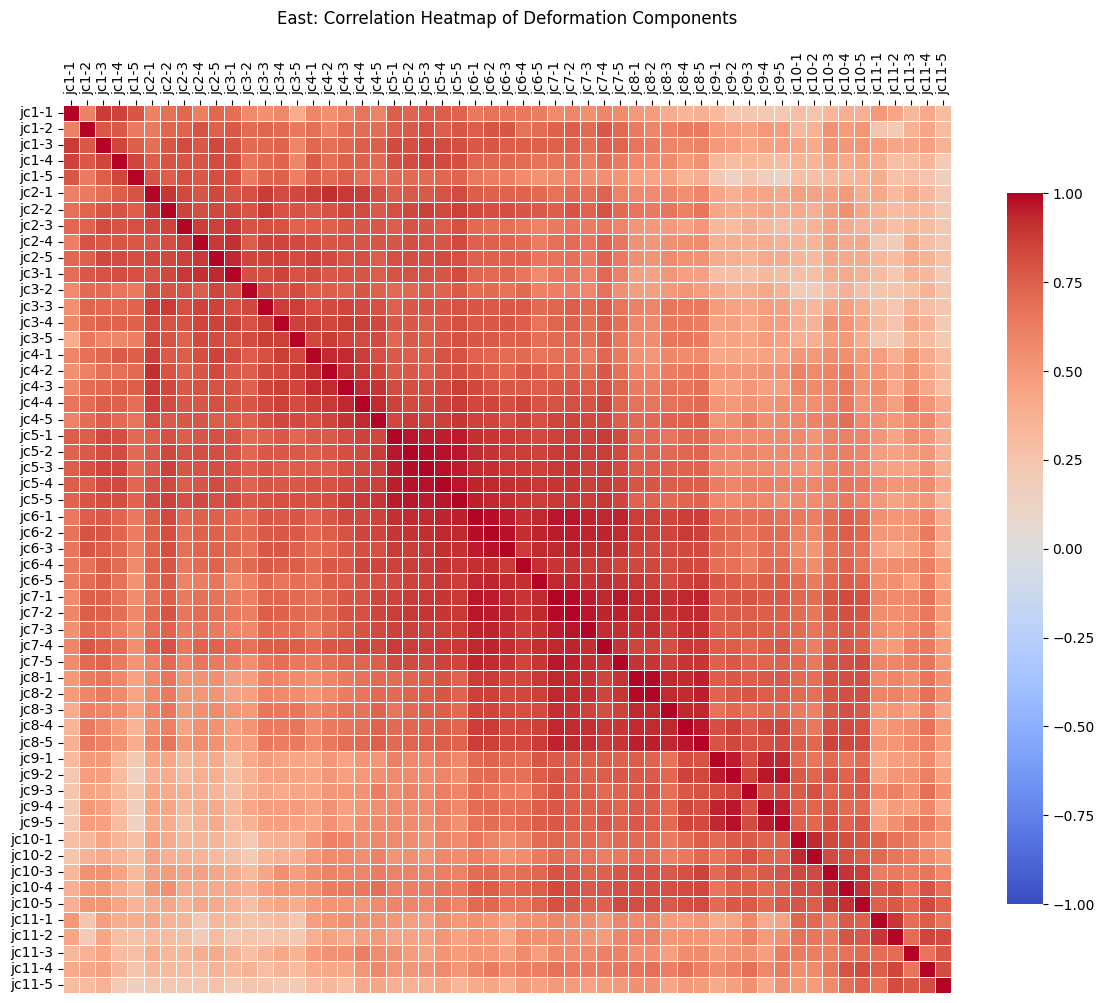

In [12]:
name = '东单次变形量(mm)_'
corr_cols = [name + i for i in tmp]
corr_mat = corr_df[corr_cols].corr()

fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(
    corr_mat,
    annot=False,
    cmap='coolwarm',
    square=True,
    linewidths=0.5,
    cbar_kws={'shrink': 0.8},
    xticklabels=tmp,   # 需要显示的标签
    yticklabels=tmp,
    vmin=-1,           # ← 统一刻度
    vmax=1,  
    ax=ax
)

# 关键：把 x 轴整体移到顶部
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
ax.tick_params(axis='x', top=True, bottom=False,rotation=90,
               labeltop=True, labelbottom=False)

plt.title('East: Correlation Heatmap of Deformation Components', pad=20)
plt.tight_layout()

plt.savefig(f'{name}热力图', dpi=300, bbox_inches='tight')
plt.show()


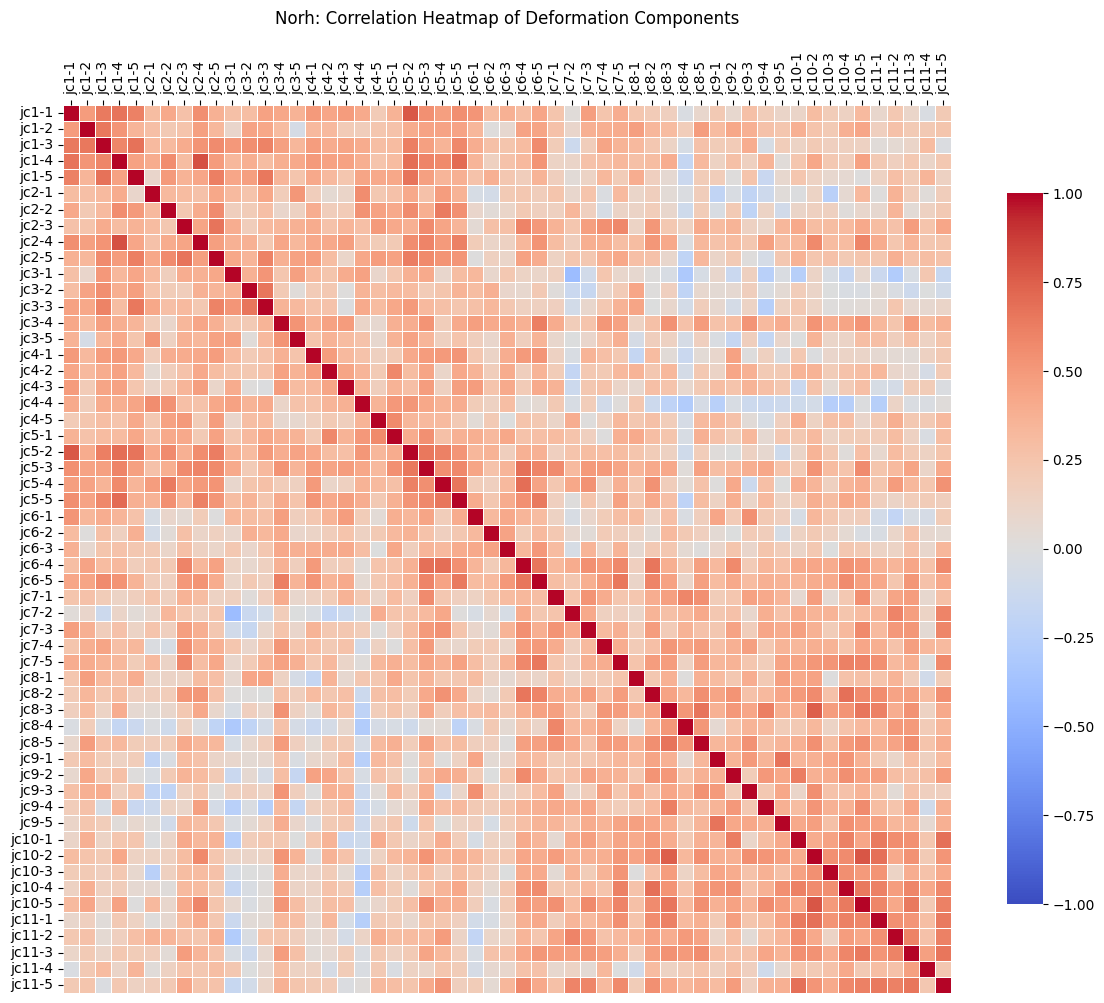

In [13]:
name = '北单次变形量(mm)_'
corr_cols = [name + i for i in tmp]
corr_mat = corr_df[corr_cols].corr()

fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(
    corr_mat,
    annot=False,
    cmap='coolwarm',
    square=True,
    linewidths=0.5,
    cbar_kws={'shrink': 0.8},
    xticklabels=tmp,   # 需要显示的标签
    yticklabels=tmp,
    vmin=-1,           # ← 统一刻度
    vmax=1,  
    ax=ax
)

# 关键：把 x 轴整体移到顶部
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
ax.tick_params(axis='x', top=True, bottom=False,rotation=90,
               labeltop=True, labelbottom=False)

plt.title('Norh: Correlation Heatmap of Deformation Components', pad=20)
plt.tight_layout()

plt.savefig(f'{name}热力图', dpi=300, bbox_inches='tight')
plt.show()

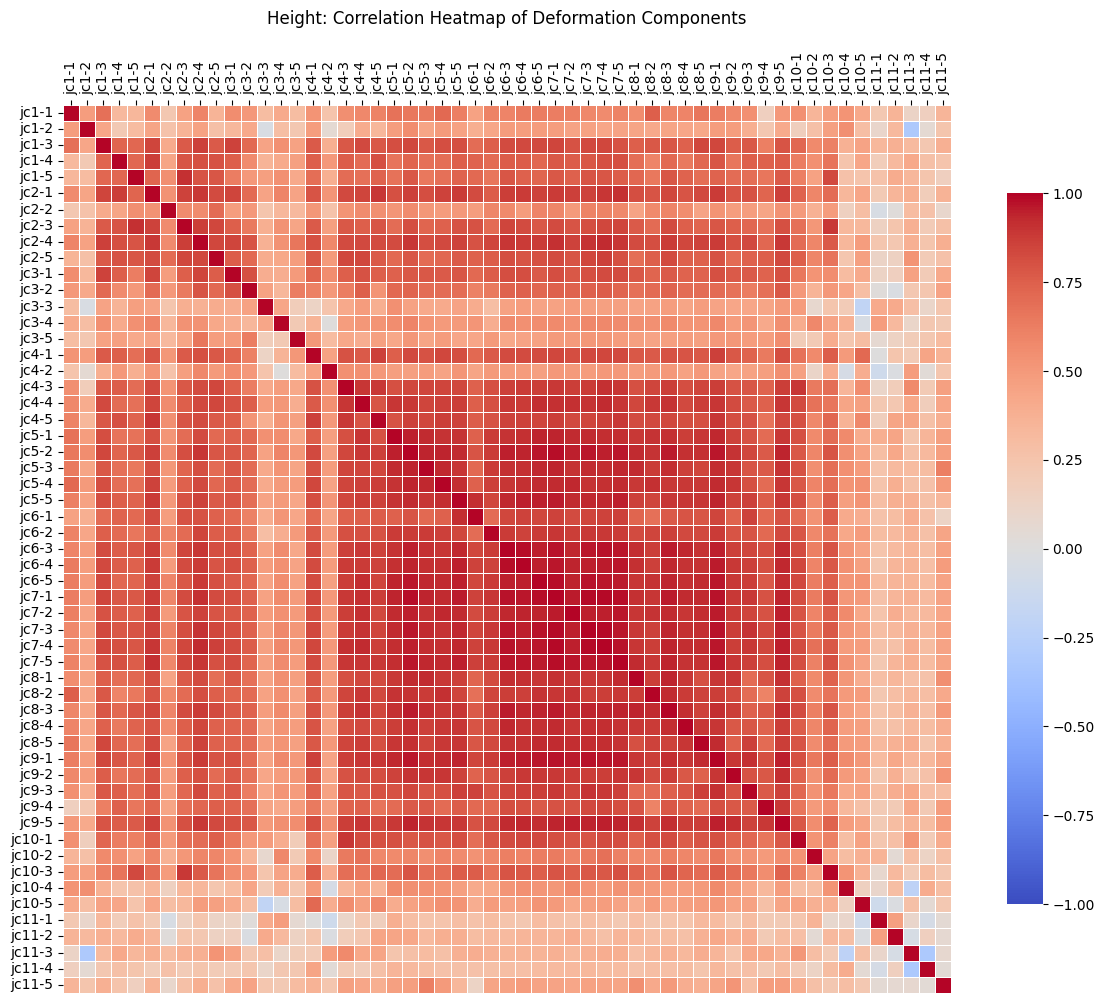

In [14]:
name = '高程单次变形量(mm)_'
corr_cols = [name + i for i in tmp]
corr_mat = corr_df[corr_cols].corr()

fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(
    corr_mat,
    annot=False,
    cmap='coolwarm',
    square=True,
    linewidths=0.5,
    cbar_kws={'shrink': 0.8},
    xticklabels=tmp,   # 需要显示的标签
    yticklabels=tmp,
        vmin=-1,           # ← 统一刻度
    vmax=1,  
    ax=ax
)

# 关键：把 x 轴整体移到顶部
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
ax.tick_params(axis='x', top=True, bottom=False,rotation=90,
               labeltop=True, labelbottom=False)

plt.title('Height: Correlation Heatmap of Deformation Components', pad=20)
plt.savefig(f'{name}热力图', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()